In [ ]:
from google.colab import auth, data_table
from google.cloud import bigquery
from pandas_gbq import to_gbq

# Proses autentikasi akun
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# Buat BigQuery client
project_id = 'dqlab21-480410'
client = bigquery.Client(project = project_id)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Inisialisasi query yang akan dijalankan
query = """
  select
  c.candidate_id,
  c.position,
  c.experience_years,
  c.major,
  c.applied_date,
  c.kpi_1,
  c.kpi_2,
  c.kpi_3,
  c.kpi_4,
  c.kpi_5,
  c.kpi_6,

  m.kpi as kpi_major

 from dqlab21-480410.recruitment_analyst.candidates as c
 left join dqlab21-480410.recruitment_analyst.major_scoring as m
 on c.major = m.major and c.position = m.position
 """

# Proses ekstraksi data dari BigQuery ke pandas
data_recruitment = client.query(query).to_dataframe()

# Tampilkan hasil
data_recruitment.head(5)

,candidate_id,position,experience_years,major,applied_date,kpi_1,kpi_2,kpi_3,kpi_4,kpi_5,kpi_6,kpi_major
0,C0001,Recruitment Analyst,0.80,Statistika,2024-11-09,2.0,3.0,3.0,4.0,3.0,3.0,5
1,C0002,HR Officer,0.01,Psikologi,2024-11-28,2.0,2.0,3.0,2.0,2.0,4.0,5
2,C0003,Recruitment Analyst,0.38,Akuntansi,2024-11-26,3.0,3.0,3.0,4.0,3.0,3.0,3
3,C0004,Business Development,0.83,Manajemen,2024-11-18,3.0,3.0,2.0,3.0,2.0,2.0,4
4,C0005,Recruitment Analyst,0.84,Sistem Informasi,2024-11-11,3.0,4.0,2.0,2.0,3.0,3.0,5


**Berikut deskripsi singkat untuk tiap kolom**:

* `candidate_id` : ID unik untuk setiap kandidat. Digunakan sebagai primary key untuk identifikasi kandidat secara individual.
* `position` : Posisi pekerjaan yang dilamar oleh kandidat.  
* `experience_years` : Total pengalaman kerja kandidat dalam satuan tahun (desimal).  
* `major` : Latar belakang pendidikan/jurusan terakhir kandidat.Digunakan untuk menilai kesesuaian pendidikan dengan posisi yang dilamar.
* `applied_date` : Tanggal kandidat mengajukan lamaran kerja.  
* `kpi_1-kpi_6` : Skor KPI yang merepresentasikan kompetensi atau aspek penilaian tertentu skala (1-5).
* `kpi_major` : Skor kesesuaian jurusan pendidikan kandidat terhadap posisi yang dilamar. Semakin tinggi nilainya, semakin relevan latar belakang pendidikan kandidat dengan posisi tersebut skala (1-5).  


**Berikut rincian KPI**


---



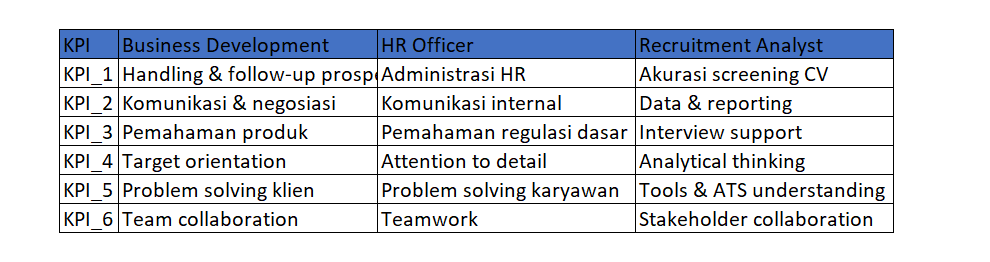

In [ ]:
data_recruitment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   candidate_id      404 non-null    object 
 1   position          410 non-null    object 
 2   experience_years  402 non-null    float64
 3   major             402 non-null    object 
 4   applied_date      412 non-null    dbdate 
 5   kpi_1             402 non-null    float64
 6   kpi_2             402 non-null    float64
 7   kpi_3             402 non-null    float64
 8   kpi_4             402 non-null    float64
 9   kpi_5             402 non-null    float64
 10  kpi_6             402 non-null    float64
 11  kpi_major         369 non-null    Int64  
dtypes: Int64(1), dbdate(1), float64(7), object(3)
memory usage: 39.2+ KB


In [ ]:
data_recruitment['applied_date']= pd.to_datetime(data_recruitment['applied_date'])

In [ ]:
data_recruitment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   candidate_id      404 non-null    object        
 1   position          410 non-null    object        
 2   experience_years  402 non-null    float64       
 3   major             402 non-null    object        
 4   applied_date      412 non-null    datetime64[ns]
 5   kpi_1             402 non-null    float64       
 6   kpi_2             402 non-null    float64       
 7   kpi_3             402 non-null    float64       
 8   kpi_4             402 non-null    float64       
 9   kpi_5             402 non-null    float64       
 10  kpi_6             402 non-null    float64       
 11  kpi_major         369 non-null    Int64         
dtypes: Int64(1), datetime64[ns](1), float64(7), object(3)
memory usage: 39.2+ KB


In [ ]:
data_recruitment.to_parquet("data_recruitment_before_cleaning.parquet")

In [ ]:
from google.colab import files
files.download("data_recruitment_before_cleaning.parquet")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>